## **Optimierungspotenzial im Rettungswesen**

*Praxisbeispiel, zur Bearbeitung in 2er Teams*

Sie arbeiten bei der Data2Decisions GmbH, einer kleinen Firma, welche für verschiedene Kunden
Datenanalysen durchführt, welche als Entscheidungsgrundlagen für strategische Managemententscheide
genutzt werden.

Von der Leiterin der Rettung SG bekommen Sie die folgende Problemstellung gestellt:
- Die Rettung SG hat eine zu tiefe Hilfsfristerreichung.
- Die Leiterin hat scheinbar alle Massnahmen, welche sie im operativen Geschäft durchführen kann
getroffen, die Hilfsfristen sind jedoch immer noch zu tief.
- Sie hofft aber, dass es auf strategischer Ebene noch Möglichkeiten gibt, die Rettung SG besser
aufzustellen, um schneller bei den Einsätzen zu sein.
- Ihnen stehen Daten aller Einsätze der Rettung SG des Jahres 2022 zur Verfügung. Darin sind die
Ausrückzeiten, die Anfahrten an die Einsatzorte und viele weitere Variablen enthalten.

Ihre Aufgabe ist es nun, die Daten zu sichten und explorativ zu erkunden, Hypothesen für mögliche
Handlungsoptionen zu entwickeln, diese Handlungsoptionen auf Basis der Datenbasis zu evaluieren und Ihre
Empfehlung(en) auszuarbeiten und soweit aufzuarbeiten, dass sie sie dem Regierungsrat des Kantons SG
(welcher wenig von Datenanalysen versteht und eher ungeduldig ist…) innerhalb weniger Minuten
präsentieren können.

In [43]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 500)  # damit alle Spalten angezeigt werden

**Aufträge**:
Für die Bearbeitung und Erarbeitung der Resultate haben sie 8 Lektionen (2 Unterrichtsblöcke) Zeit. Die Aufträge a) – c) werden nach der ersten Lektion gemeinsam besprochen. Zur Hälfte der nächsten Veranstaltung werden alle 2er Teams ihre Vorschläge dem Regierungsrat präsentieren und wir werden die Vorschläge gemeinsam diskutieren und reflektieren.

## **Aufträge zum Verständnis der Domäne**

a) (ca. 10min) Recherchieren Sie die Begriffe «Hilfsfrist» und «Hilfsfristerreichung».
- Was bedeuten diese Begriffe?
- Wie stehen diese im Zusammenhang mit der Performance von Rettungsdiensten?
- Wie stehen diese Begriffe im Zusammenhang mit den gelieferten Daten?

**Antwort**: ...

b) (ca. 10min) Schauen Sie das SRF-Video: ["Sanität wegen Fachkräftemangel am Anschlag 00:00 –
05:04"1](https://www.srf.ch/play/tv/schweiz-aktuell/video/sanitaet-wegen-fachkraeftemangel-am-anschlag?urn=urn:srf:video:177c29ee-b3d6-4b8a-aa62-67a3cd854efe). Was bedeutet für Sie eine gute rettungsdienstliche Versorgung in der Schweiz und wie würden Sie versuchen, diese sicherzustellen?

**Antwort**: ...

## **Aufträge zum Verständnis der Rohdaten**

c) (ca. 10min) Betrachten Sie die gelieferten Rohdaten (missions.csv und bases.csv) und stellen Sie
sicher, dass Sie sämtliche Felder der Rohdaten verstehen und korrekt interpretieren können.

**Datenfelder in missions.csv**
- t_alarm_sec: Zeitpunkt der Alarmierung des Einsatzes
- lat: Breitengrad des Einsatzes
- lng: Längengrad des Einsatzes
- dt_to_launch: Zeitintervall [sec] Alarmierung bis Ausrücken des Einsatzes [sec]
- dt_to_poa: Zeitintervall [sec] Ausrücken bis Eintreffen Einsatzort des Einsatzes
- dt_to_completion: Zeitintervall [sec] Eintreffen Einsatzort bis Ende Einsatz des Einsatzes
- base: Stützpunkt-Nummer, ab dem der Einsatz bedient wurde
- dist: Distanz zwischen Stützpunkt und Einsatzort [Luftlinie Koordinaten] 

**Datenfelder in bases.csv:**
- nr: Stützpunkt-Nummer (1,2,3)
- lat: Breitengrad des Stützpunktes
- lng: Längengrad des Stützpunktes

### **Grobes Verständnis der Daten**

In [ ]:
    missions = pd.read_csv('C:\\Users\\marck\\Documents\\_OST\\DAANA\\DAANA\\Fallstudie_Rettungswesen\\missions.csv')
    display(missions.head())

,t_alarm_sec,lat,lng,dt_to_launch,dt_to_completion,dt_to_poa,base,dist
0,2018-01-01T00:31:57Z,50.509220,10.683720,40,2779,417,1,0.066918
1,2018-01-01T01:33:29Z,50.515171,10.561964,60,3627,1062,1,0.188647
2,2018-01-01T02:23:56Z,50.300076,10.925221,376,1976,393,3,0.025221
3,2018-01-01T03:07:32Z,50.367345,11.210582,70,7040,1236,2,0.213099
4,2018-01-01T03:31:58Z,50.502782,10.592543,166,11178,837,1,0.157482


50.432811592248974
50.444388000000004
50.229636
50.566215
10.811755747481708
10.771543999999999
10.326075
11.225822


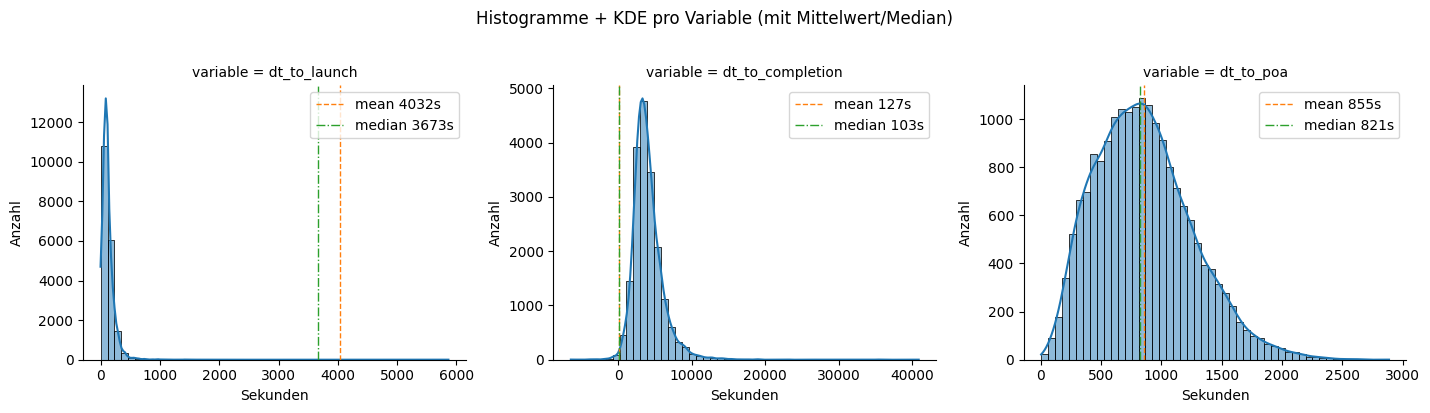

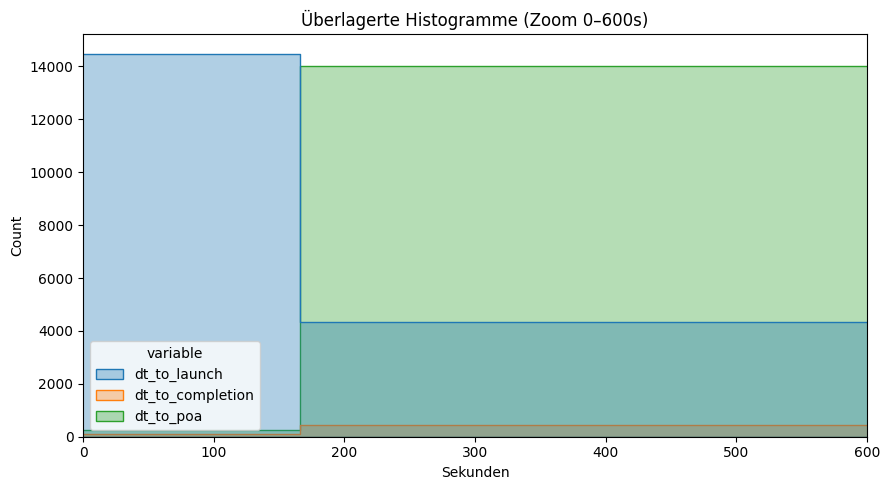

In [45]:
# Aufgabe 1: Lage, Minima und Maxima für 'lat'
lat = missions["lat"]

lat_mean = lat.mean()
lat_median = lat.median()
lat_min = lat.min()
lat_max = lat.max()

idx_min = lat.idxmin()
idx_max = lat.idxmax()

print(lat_mean)
print(lat_median)
print(lat_min)
print(lat_max)

# print(missions.loc[idx_min])
# print(missions.loc[idx_max])

#max = missions.loc[missions["lat"].idxmin()]
#pint(max)

# Aufgabe 2: Lage, Minima und Maxima für 'lng'
lng = missions["lng"]

lng_mean = lng.mean()
lng_median = lng.median()
lng_min = lng.min()
lng_max = lng.max()

idx_min = lng.idxmin()
idx_max = lng.idxmax()

print(lng_mean)
print(lng_median)
print(lng_min)
print(lng_max)

#----------------------------------------------------------------------------------
stats = df_plot.groupby("variable")["seconds"].agg(["mean", "median"]).reset_index()
g = sns.FacetGrid(df_plot, col="variable", sharex=False, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x="seconds", bins=50, kde=True, color="C0")
for ax, (_, row) in zip(g.axes.flatten(), stats.iterrows()):
    ax.axvline(row["mean"], color="C1", linestyle="--", linewidth=1, label=f"mean {row['mean']:.0f}s")
    ax.axvline(row["median"], color="C2", linestyle="-.", linewidth=1, label=f"median {row['median']:.0f}s")
    ax.legend()
    ax.set_xlabel("Sekunden")
    ax.set_ylabel("Anzahl")
g.fig.suptitle("Histogramme + KDE pro Variable (mit Mittelwert/Median)", y=1.02)
plt.tight_layout()
plt.show()

# Zoom auf 0-600s
plt.figure(figsize=(9,5))
sns.histplot(data=df_plot, x="seconds", hue="variable", bins=50, element="step", stat="count", common_norm=False, alpha=0.35)
plt.xlim(0, 600)  # anpassen falls nötig
plt.xlabel("Sekunden")
plt.title("Überlagerte Histogramme (Zoom 0–600s)")
plt.tight_layout()
plt.show()


In [46]:
# Aufgabe 3: Lage, Streuung, Minima und Maxima für 'dt_to_launch'
dt_to_launch = missions["dt_to_launch"]

dt_to_launch.mean()
dt_to_launch.median()
dt_to_launch.min()
dt_to_launch.max()

idx_min = dt_to_launch.idxmin()
idx_max = dt_to_launch.idxmax()

print(dt_to_launch.mean)
print(dt_to_launch.median)
print(dt_to_launch.min)
print(dt_to_launch.max)

# Aufgabe 4: Lage, Streuung, Minima und Maxima für 'dt_to_completion'

dc = missions["dt_to_completion"]

dc.mean()
dc.median()
dc.min()
dc.max()

idx_min =dc.idxmin()
idx_max =dc.idxmax()

print(dc.mean)
print(dc.median)
print(dc.min)
print(dc.max)


# Aufgabe 5: Lage, Streuung, Minima und Maxima für 'dt_to_poa'

dp = missions["dt_to_poa"]

dp.mean()
dp.median()
dp.min()
dp.max()

idx_min = dp.idxmin()
idx_max = dp.idxmax()

print(dp.mean)
print(dp.median)
print(dp.min)
print(dp.max)

# Aufgabe 6: Lage, Streuung, Minima und Maxima für 'dist'

dist = missions["dist"]

dist.mean()
dist.median()
dist.min()
dist.max()

idx_min = dist.idxmin()
idx_max = dist.idxmax()

print(dist.mean)
print(dist.median)
print(dist.min)
print(dist.max)

<bound method Series.mean of 0         40
1         60
2        376
3         70
4        166
        ... 
18857     94
18858     93
18859     39
18860     75
18861    138
Name: dt_to_launch, Length: 18862, dtype: int64>
<bound method Series.median of 0         40
1         60
2        376
3         70
4        166
        ... 
18857     94
18858     93
18859     39
18860     75
18861    138
Name: dt_to_launch, Length: 18862, dtype: int64>
<bound method Series.min of 0         40
1         60
2        376
3         70
4        166
        ... 
18857     94
18858     93
18859     39
18860     75
18861    138
Name: dt_to_launch, Length: 18862, dtype: int64>
<bound method Series.max of 0         40
1         60
2        376
3         70
4        166
        ... 
18857     94
18858     93
18859     39
18860     75
18861    138
Name: dt_to_launch, Length: 18862, dtype: int64>
<bound method Series.mean of 0         2779
1         3627
2         1976
3         7040
4        11178
         ...

Aufgabe 7: Interpretiert die Resultate der ersten 6 Aufgaben.
Was fällt auf? Sind die Werte plausibel? Könnte es falsch erhobenene Werte haben?

**Antwort**: 

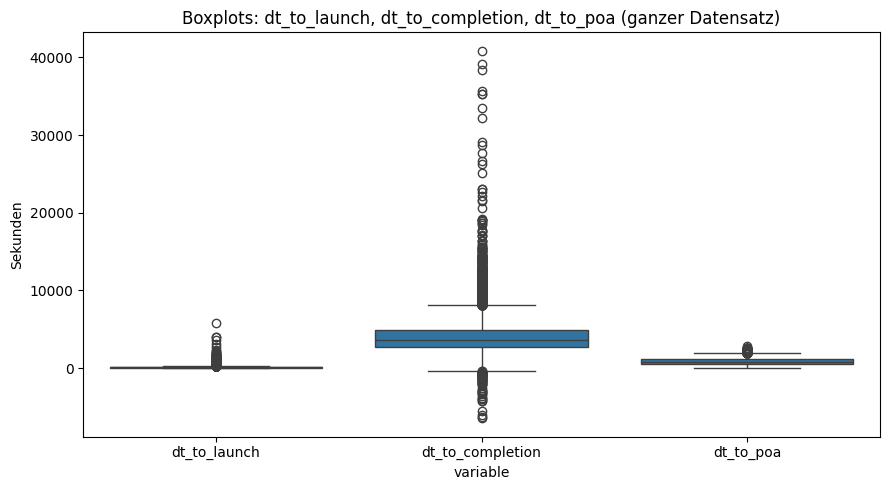

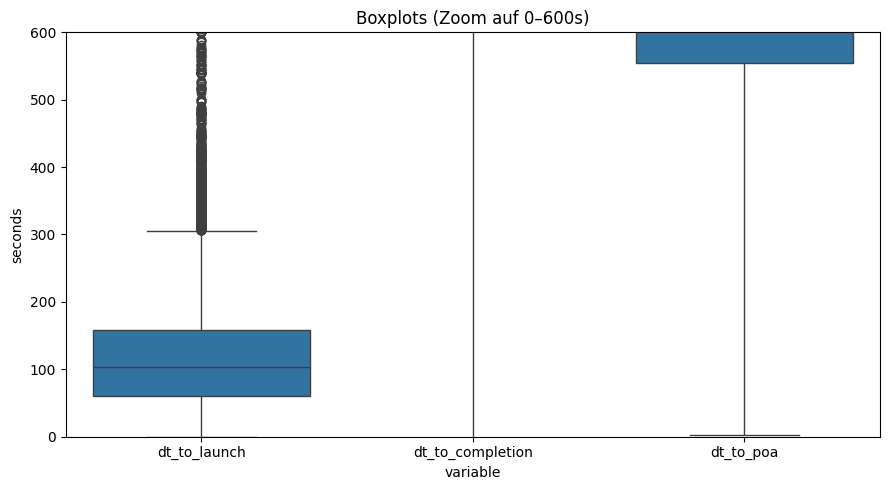

In [47]:
# Aufgabe 8: Boxpots für 'dt_to_launch', 'dt_to_completion' und 'dt_to_poa' im gesamten Datensatz
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["dt_to_launch", "dt_to_completion", "dt_to_poa"]
df_plot = missions[cols].dropna(how="all").melt(value_vars=cols, var_name="variable", value_name="seconds")

plt.figure(figsize=(9,5))
sns.boxplot(x="variable", y="seconds", data=df_plot)
plt.ylabel("Sekunden")
plt.title("Boxplots: dt_to_launch, dt_to_completion, dt_to_poa (ganzer Datensatz)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
sns.boxplot(x="variable", y="seconds", data=df_plot)
plt.ylim(0, 600)
plt.title("Boxplots (Zoom auf 0–600s)")
plt.tight_layout()
plt.show()

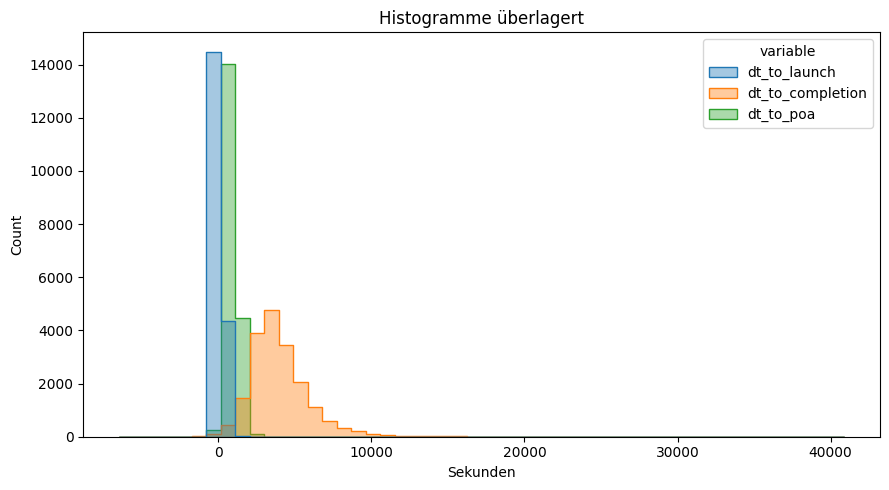

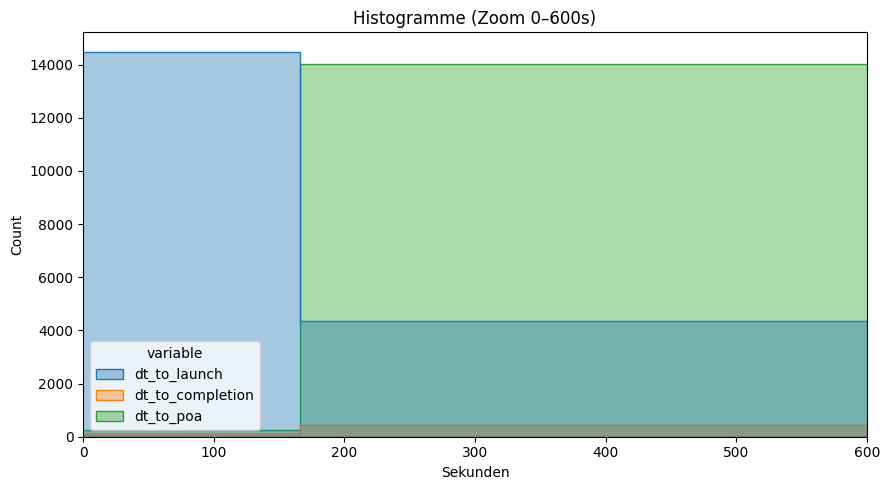

In [48]:
# Aufgabe 9: Histogramme für 'dt_to_launch', 'dt_to_completion' und 'dt_to_poa' im gesamten Datensatz
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["dt_to_launch", "dt_to_completion", "dt_to_poa"]
df_plot = missions[cols].dropna(how="all").melt(value_vars=cols, var_name="variable", value_name="seconds")

plt.figure(figsize=(9,5))
sns.histplot(data=df_plot, x="seconds", hue="variable", bins=50, element="step", stat="count", common_norm=False, alpha=0.4)
plt.xlabel("Sekunden")
plt.title("Histogramme überlagert")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
sns.histplot(data=df_plot, x="seconds", hue="variable", bins=50, element="step", common_norm=False, alpha=0.4)
plt.xlim(0, 600)
plt.xlabel("Sekunden")
plt.title("Histogramme (Zoom 0–600s)")
plt.tight_layout()
plt.show()

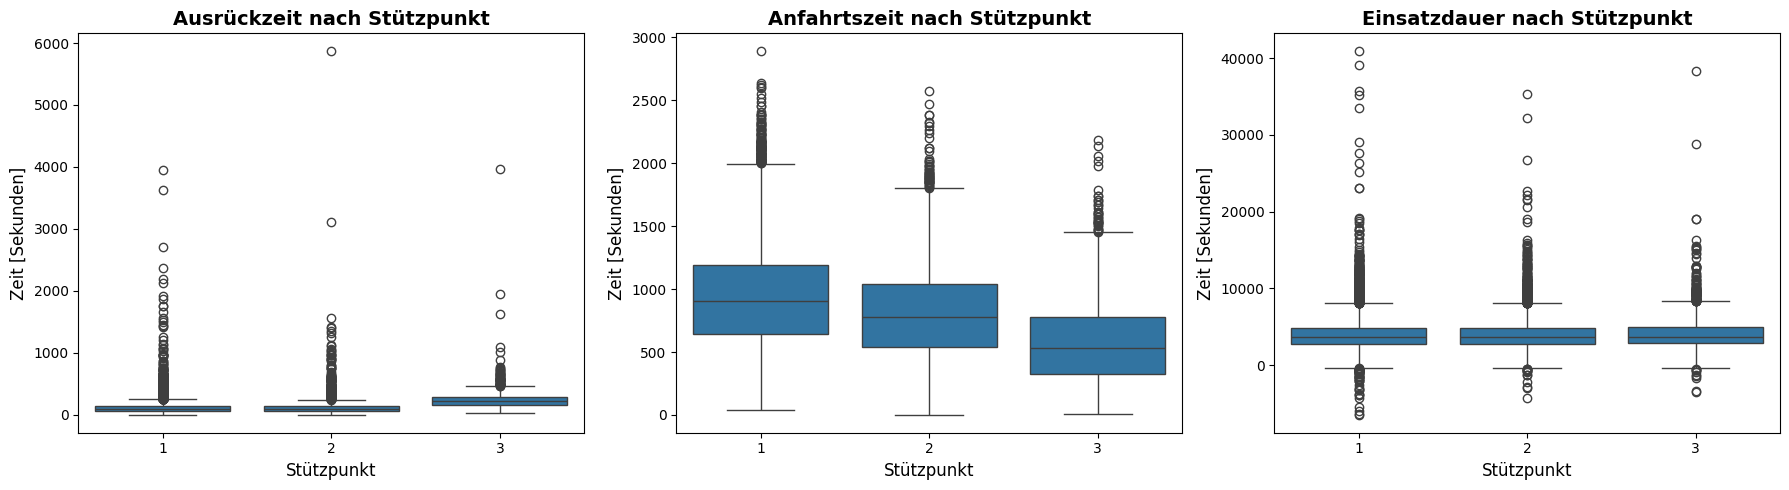

In [49]:
# Aufgabe 10: Boxplots für 'dt_to_launch', 'dt_to_completion' und 'dt_to_poa' gruppiert nach 'base'

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=missions, x="base", y="dt_to_launch", ax=axes[0])
axes[0].set_title("Ausrückzeit nach Stützpunkt", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Stützpunkt", fontsize=12)
axes[0].set_ylabel("Zeit [Sekunden]", fontsize=12)

sns.boxplot(data=missions, x="base", y="dt_to_poa", ax=axes[1])
axes[1].set_title("Anfahrtszeit nach Stützpunkt", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Stützpunkt", fontsize=12)
axes[1].set_ylabel("Zeit [Sekunden]", fontsize=12)

sns.boxplot(data=missions, x="base", y="dt_to_completion", ax=axes[2])
axes[2].set_title("Einsatzdauer nach Stützpunkt", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Stützpunkt", fontsize=12)
axes[2].set_ylabel("Zeit [Sekunden]", fontsize=12)

plt.tight_layout()
plt.show()

Aufgabe 11: Interpretiert die Resultate von Aufgaben 8 - 10. Was fällt auf? Wo lohnt es sich die Grafiken zu verfeinern? Was "sieht" man? Was "sieht" man (noch) nicht?

**Antwort**: (beschreibt kurz die Feststellungen, auch die, die dazu geführt haben, dass ihr etwas an den Grafiken geändert habt)